# Estimación drececimiento del Glaciar Parque Nacional Natural El Cocuy

---

In [1]:
#Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns

In [43]:
#Importar datos
df = pd.read_excel(r"D:\GEOMATICA\Proyecto\Datasets\Historico.xlsx")
df.head(10)


,Año,Area (km2),Temperatura (°C),Precipitación (mm)
0,2010,16.540000,3.047273,1971.60
1,2016,14.460000,2.142857,1565.50
2,2017,13.940000,3.216667,1831.28
3,2019,13.670000,3.216667,1753.62
4,2020,13.380000,3.718182,1466.44
5,2021,13.170000,2.942857,1760.50
6,2022,13.707424,3.566667,1708.40
7,2023,14.157184,3.708333,1722.10
8,2024,12.367641,4.205556,1356.96


----
## Linealidad de los datos

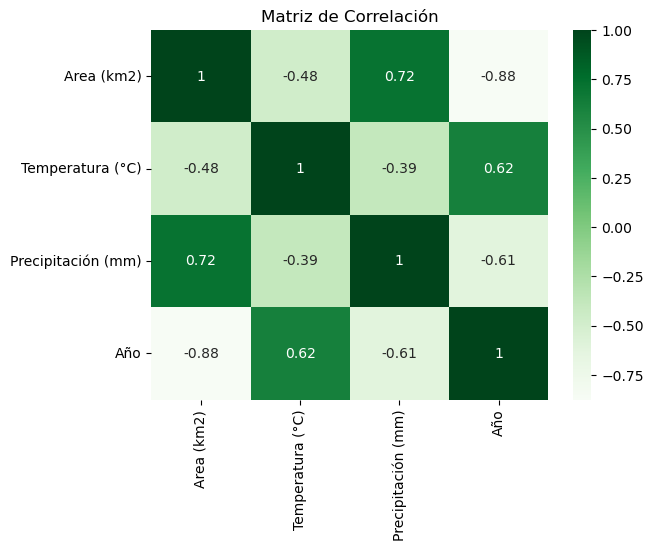

In [44]:
# Matriz de correlación
correlacion = df[['Area (km2)', 'Temperatura (°C)', 'Precipitación (mm)', 'Año']].corr()

# Crear un heatmap para visualizar la matriz de correlación
sns.heatmap(correlacion, annot=True, cmap='Greens')
plt.title('Matriz de Correlación')
plt.show()


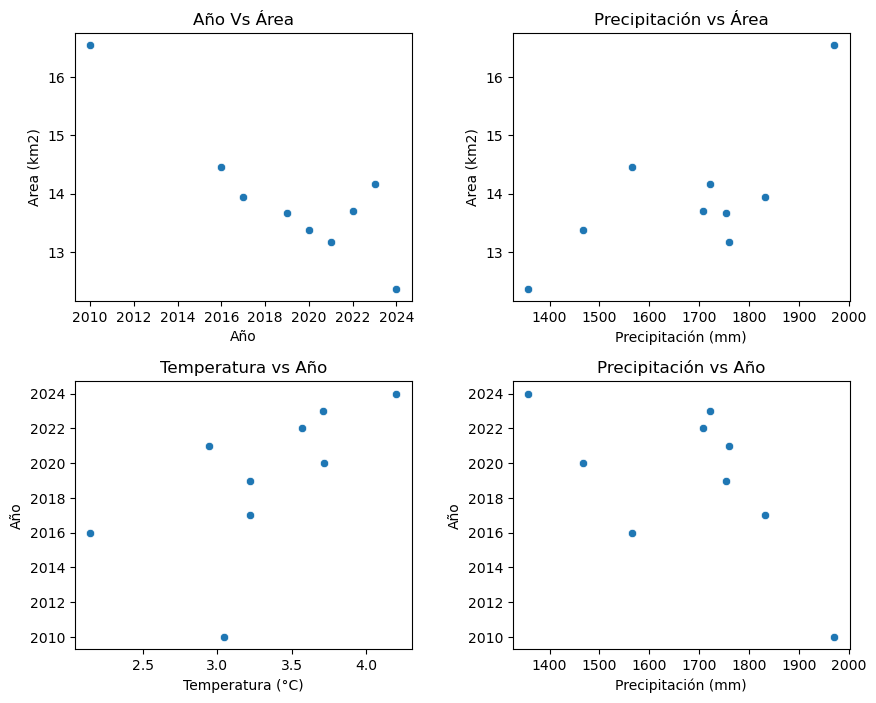

In [45]:

# Crear un gráfico de dispersión para cada variable predictora
plt.figure(figsize=(10, 8))

# Gráfico de dispersión: Área vs Temperatura
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Año'], y=df['Area (km2)'])
plt.title('Año Vs Área')

# Gráfico de dispersión: Área vs Precipitación
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['Precipitación (mm)'], y=df['Area (km2)'])
plt.title('Precipitación vs Área')

# Gráfico de dispersión: Área vs Temperatura
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Temperatura (°C)'], y=df['Año'])
plt.title('Temperatura vs Año')

# Gráfico de dispersión: Área vs Temperatura
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Precipitación (mm)'], y=df['Año'])
plt.title('Precipitación vs Año')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

---
## Regresion Lineal Multiple
#### Variables independientes Año, Precipitación, Dependientes Area
#### Modelo #1 Año y Precipitación

In [46]:
#Seleccionar variables
x1 = "Año"
x2 = "Precipitación (mm)"
y = "Area (km2)"

#Año	Area (km2)	Temperatura (°C)	Precipitación (mm)

Coeficientes:  [-0.18601485  0.00176217]
Intercepción:  386.5534506843803
Ecuación del plano: y = -0.186 * Horas Trabajadas + 0.002 * Horas de Descanso + 386.553
Coeficiente de determinación:  0.818


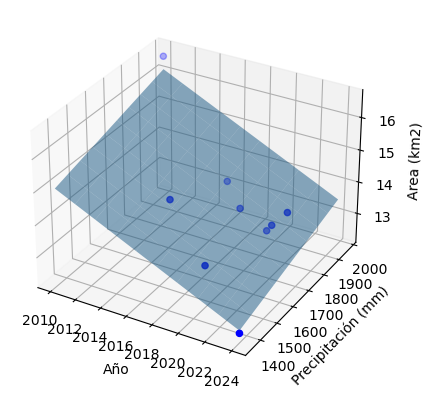

In [47]:
#Crear resultados
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Horas Trabajadas + {} * Horas de Descanso + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Area (km2)")
plt.show()

In [51]:
# Generar predicción 

año_futuro = 2044 
Precipitacion_futura = 649.1

prediccion_nueva = pd.DataFrame({x1: [año_futuro], x2: [Precipitacion_futura]})
area_prediccion = modelo.predict(prediccion_nueva)

print('La predicción del área para el año', año_futuro, 'con una precipitación estimada de ', Precipitacion_futura, 'mm es de ', round(area_prediccion[0], 3),'km2')

La predicción del área para el año 2044 con una precipitación estimada de  649.1 mm es de  7.483 km2


#### Modelo #2 Año y Temperatura

In [52]:
#Seleccionar variables
x1 = "Año"
x2 = "Temperatura (°C)"
y = "Area (km2)"

Coeficientes:  [-0.25014051  0.19887066]
Intercepción:  518.3362505021407
Ecuación del plano: y = -0.25 * Horas Trabajadas + 0.199 * Horas de Descanso + 518.336
Coeficiente de determinación:  0.772


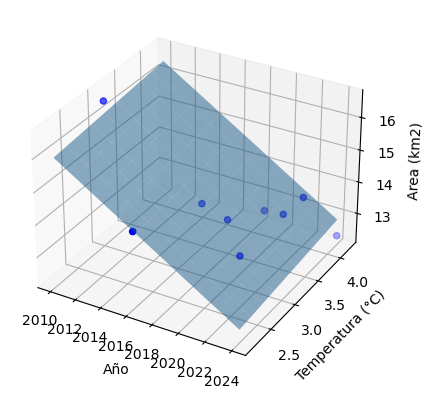

In [53]:
#Crear resultados
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Horas Trabajadas + {} * Horas de Descanso + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Area (km2)")
plt.show()

In [57]:
# Generar predicción 

año_futuro = 2049 
Temperatura_futura = 6.7

prediccion_nueva = pd.DataFrame({x1: [año_futuro], x2: [Temperatura_futura]})
area_prediccion = modelo.predict(prediccion_nueva)

print('La predicción del área para el año', año_futuro, 'con una temperatura estimada de ', Temperatura_futura, '°C es de ', round(area_prediccion[0], 3),'km2')

La predicción del área para el año 2049 con una temperatura estimada de  6.7 °C es de  7.131 km2


#### Modelo #3 Año, Temperatura y Precipitación

In [58]:
#Seleccionar variables
x1 = "Año"
x2 = "Temperatura (°C)"
x3 = "Precipitación (mm)"
y = "Area (km2)"

Coeficientes:  [-0.20326479  0.20736168  0.00177175]
Intercepción:  420.6810978769396
Ecuación del plano: y = -0.203 * Horas Trabajadas + 0.207 * Horas de Descanso + 420.681
Coeficiente de determinación:  0.825


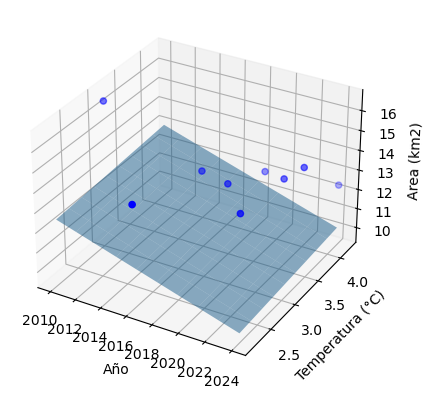

In [59]:
#Crear resultados
variables_x = [x1, x2,x3]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Horas Trabajadas + {} * Horas de Descanso + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Area (km2)")
plt.show()

In [63]:
# Generar predicción 

año_futuro = 2034 
Temperatura_futura = 5.2
Precipitacion_futura=1073.8
prediccion_nueva = pd.DataFrame({x1: [año_futuro], x2: [Temperatura_futura],x3: [Precipitacion_futura]})
area_prediccion = modelo.predict(prediccion_nueva)

print('La predicción del área para el año', año_futuro, 'con una temperatura estimada de ', Temperatura_futura, '°C es de y una precipitación estimada',Precipitacion_futura,' mm es de', round(area_prediccion[0], 3),'km2')

La predicción del área para el año 2034 con una temperatura estimada de  5.2 °C es de y una precipitación estimada 1073.8  mm es de 10.221 km2


----
## Regresión Polinomial

In [64]:
# Definir variables independientes (X) y dependiente (y)
X = df[['Año', 'Temperatura (°C)', 'Precipitación (mm)']]
y = df['Area (km2)']

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

degrees = [2, 3]
results = {}

for degree in degrees:
    # Crear un pipeline que incluya la transformación polinomial y la regresión lineal
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Entrenar el modelo
    model.fit(X, y)
    
    # Realizar predicciones
    y_pred = model.predict(X)
    
    # Evaluar el modelo
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
    cv_mean = np.mean(cv_scores)
    
    # Guardar resultados
    results[degree] = {
        'MSE': mse,
        'R²': r2,
        'Cross-Val R²': cv_mean,
        'Cross-Val R² (folds)': cv_scores
    }

# Mostrar los resultados
for degree in degrees:
    print(f"Grado {degree}:")
    print(f"MSE: {results[degree]['MSE']:.4f}")
    print(f"R²: {results[degree]['R²']:.4f}")
    print(f"Cross-Val R² promedio: {results[degree]['Cross-Val R²']:.4f}")
    print(f"Cross-Val R² (folds): {results[degree]['Cross-Val R² (folds)']}")
    print("-" * 40)


Grado 2:
MSE: 0.0000
R²: 1.0000
Cross-Val R² promedio: -71.0654
Cross-Val R² (folds): [  -1.5615514  -197.5757962   -14.05890939]
----------------------------------------
Grado 3:
MSE: 0.0000
R²: 1.0000
Cross-Val R² promedio: -88.1205
Cross-Val R² (folds): [ -26.19972726 -235.59302969   -2.56883359]
----------------------------------------


Para los grados 2 y 3 muestra sobreajuste dado que el R2 es 1 y la validación cruzada es negativa por lo cual se descarta este modelo 

## Modelo SVR

In [65]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
from sklearn.svm import SVR

# Definir los kernels a probar
kernels = ['linear', 'poly', 'rbf']
svr_results = {}

for kernel in kernels:
    # Crear el modelo SVR
    svr = SVR(kernel=kernel)
    
    # Entrenar el modelo
    svr.fit(X_scaled, y)
    
    # Realizar predicciones
    y_pred = svr.predict(X_scaled)
    
    # Evaluar el modelo
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Validación cruzada
    cv_scores = cross_val_score(svr, X_scaled, y, cv=3, scoring='r2')
    cv_mean = np.mean(cv_scores)
    
    # Guardar resultados
    svr_results[kernel] = {
        'MSE': mse,
        'R²': r2,
        'Cross-Val R²': cv_mean,
        'Cross-Val R² (folds)': cv_scores
    }

# Mostrar los resultados
for kernel in kernels:
    print(f"Kernel '{kernel}':")
    print(f"MSE: {svr_results[kernel]['MSE']:.4f}")
    print(f"R²: {svr_results[kernel]['R²']:.4f}")
    print(f"Cross-Val R² promedio: {svr_results[kernel]['Cross-Val R²']:.4f}")
    print(f"Cross-Val R² (folds): {svr_results[kernel]['Cross-Val R² (folds)']}")
    print("-" * 40)


Kernel 'linear':
MSE: 0.2188
R²: 0.8139
Cross-Val R² promedio: -3.9319
Cross-Val R² (folds): [ -0.33536218 -10.63427258  -0.82611958]
----------------------------------------
Kernel 'poly':
MSE: 0.0634
R²: 0.9461
Cross-Val R² promedio: -2.7882
Cross-Val R² (folds): [-2.85615608 -6.04296148  0.53444525]
----------------------------------------
Kernel 'rbf':
MSE: 0.3322
R²: 0.7175
Cross-Val R² promedio: -2.1790
Cross-Val R² (folds): [-2.40513903 -3.63726599 -0.49464419]
----------------------------------------


De acuerdo con el MSE y R2, el mejor modelo que se ajusta a los datos es el modelo SVR de Kernel Poly. La validación cruzada es negativa debido a la poca cantidad de datos.

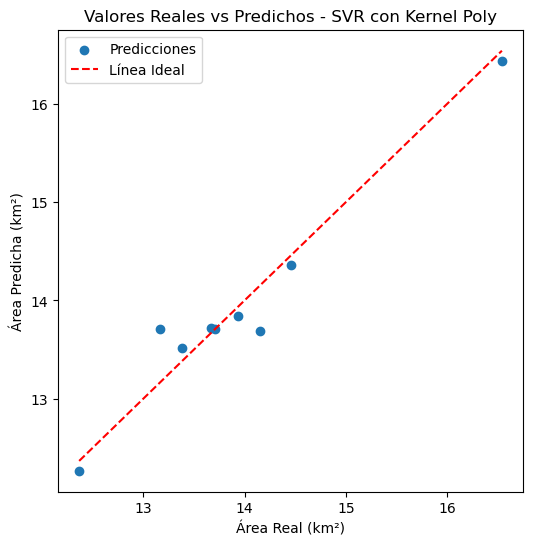

In [66]:
# Reentrenar el modelo SVR con kernel polinomial
best_svr_model = SVR(kernel='poly')

# Entrenar el modelo con los datos escalados
best_svr_model.fit(X_scaled, y)

# Realizar las predicciones con el modelo entrenado
y_pred_svr = best_svr_model.predict(X_scaled)

# Crear un gráfico de valores reales vs predichos
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_svr, label='Predicciones')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Línea Ideal')
plt.xlabel('Área Real (km²)')
plt.ylabel('Área Predicha (km²)')
plt.title('Valores Reales vs Predichos - SVR con Kernel Poly')
plt.legend()
plt.show()


### Predicción de escenarios futuros

In [74]:
# Supón que quieres predecir para el año 2025, con una temperatura de 3.5°C y precipitación de 1500 mm
nuevo_dato = [[2049, 4.2, 1357.0]]

# Escalar el nuevo dato usando el mismo scaler
nuevo_dato_scaled = scaler.transform(nuevo_dato)

# Realizar la predicción
area_predicha = best_svr_model.predict(nuevo_dato_scaled)
print(f'El área predicha para el año 2025 es: {area_predicha[0]:.2f} km²')


El área predicha para el año 2025 es: -20.25 km²


c:\Users\NicolasViasus\.conda\envs\mda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
